## Problem Statement 

Based on customer complaint data in the fields of finance, services... 
The classification of complaints with negative, positive, banking, debit card complaints is a necessary issue. classified automatically and requires high accuracy.

Based on the above requirements, we divide into 5 types of complaints as below.

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the knowledge learned about NLP, apply to classify complaints according to specific steps and apply training algorithms. 
From there get the model with the best results.

## Pipelines that needs to be performed:

The steps to build a specific model follow the steps below:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import pickle
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn .model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import swifter
from wordcloud import WordCloud
model = spacy.load('en_core_web_sm')

2023-01-17 11:28:51.073327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-17 11:28:51.073348: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-17 11:28:52.302326: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-17 11:28:52.302344: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-17 11:28:52.302358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Tech-thaipv): /proc/driver/nvidia/version does not exist


In [2]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [3]:
# Load json data and convert to Dataframe
f = open('complaints-2021-05-14_08_16.json', 'r', encoding='utf-8')

data = json.load(f)
df=pd.json_normalize(data, max_level=None)

In [4]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [5]:
df.columns.tolist()

['_index',
 '_type',
 '_id',
 '_score',
 '_source.tags',
 '_source.zip_code',
 '_source.complaint_id',
 '_source.issue',
 '_source.date_received',
 '_source.state',
 '_source.consumer_disputed',
 '_source.product',
 '_source.company_response',
 '_source.company',
 '_source.submitted_via',
 '_source.date_sent_to_company',
 '_source.company_public_response',
 '_source.sub_product',
 '_source.timely',
 '_source.complaint_what_happened',
 '_source.sub_issue',
 '_source.consumer_consent_provided']

In [6]:
df.shape

(78313, 22)

_Select the columns containing the information and analysis, select the appropriate column_

In [7]:
check = df['_source.sub_issue'].unique().tolist()
print(len(check))
print(check[:10])

206
['Debt is not yours', "Didn't receive enough information to verify debt", 'Problem with rewards from credit card', None, 'Charged too much interest', 'Problem using a debit or ATM card', 'Company closed your account', 'Cashing a check', 'Information belongs to someone else', 'Funds not handled or disbursed as instructed']


> df['_source.sub_issue'] have 206/78313 it's too small data to analysis and train model, we'll exclude it.

In [8]:
check = df['_source.sub_product'].unique().tolist()
print(len(check))
print(check[:10])

73
['Credit card debt', 'General-purpose credit card or charge card', 'Conventional home mortgage', 'Checking account', 'Other personal consumer report', 'Credit reporting', 'Other type of mortgage', 'Loan', 'Domestic (US) money transfer', 'Other mortgage']


> df['_source.sub_product'] have 206/78313 it's too small data to analysis and train model, we'll exclude it.

In [9]:
check = df['_source.complaint_what_happened'].unique().tolist()
print(len(check))
print(check[:5])

20931
['', 'Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.', 'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX   changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.', 'Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulent

> column df['_source.complaint_what_happened'] has quite high data, contains a lot of important information. We will analyze it

## Data preparation

In [10]:
# Select and create new dataframe from df
df_coml = df[['_source.complaint_what_happened']]
del df

In [11]:
# rename column : _source.complaint_what_happened to "complaints"
df_coml = df_coml.rename(columns={'_source.complaint_what_happened':'complaints'})
df_coml.head()

,complaints
0,
1,Good morning my name is XXXX XXXX and I apprec...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...
3,
4,


In [12]:
df_coml['complaints']

0                                                         
1        Good morning my name is XXXX XXXX and I apprec...
2        I upgraded my XXXX XXXX card in XX/XX/2018 and...
3                                                         
4                                                         
                               ...                        
78308                                                     
78309    On Wednesday, XX/XX/XXXX I called Chas, my XXX...
78310    I am not familiar with XXXX pay and did not un...
78311    I have had flawless credit for 30 yrs. I've ha...
78312    Roughly 10+ years ago I closed out my accounts...
Name: complaints, Length: 78313, dtype: object

In [13]:
# Strip the spaces at the beginning of the sentence.
df_coml['complaints']=df_coml['complaints'].apply(lambda x: x.strip())

In [14]:
# Check nan values in df_compl
df_coml['complaints'].isna().sum()

0

In [15]:
#Assign nan in place of blanks in the complaints column
df_coml['complaints'].replace("", np.nan, inplace=True)

In [16]:
# Check nan values in comlaints again
df_coml['complaints'].isna().sum()

57241

In [17]:
# Rate nan values after processing space to nan values
print(round(df_coml['complaints'].isna().sum()*100/len(df_coml),4),'%')

73.0926 %


In [18]:
#Remove all rows where complaints column is nan
df_coml.dropna(subset=['complaints'], inplace=True)
df_coml.shape

(21072, 1)

### After processing with space values and nan values, we clear more than 73% all of complaints text

## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers
* Remove symbols are XX, digits...

Cleaning operations and perform the following:
* Lemmatize the texts
* Extract POS tags of lemma text and remove all words not in tag = ['JJ', 'NN', 'NNP', 'UH', 'VB', 'VBG', 'WDT' ]- denoted throughout as multiPOS
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"]- Is denoted throughout as uniquePOS


In [19]:
# Write your function here to clean the text and remove all the unnecessary elements.
def text_process(text):
    text = text.lower()
    text = re.sub(r'\s\{\$\S*', '',text) # Remove text within curly braces  - number
    text = re.sub(r'\n', '', text) # Remove line breaks
    text = re.sub(r'\(\w*\)', '', text) #remove text within braces
    text = re.sub(r'(\W\s)|(\W$)|(\W\d*)', ' ',text) # Remove punctuation
    text = re.sub(r'x+((/xx)*/\d*\s*)|x*', '',text) #Remove date
    text = re.sub(r'\d+\s', '', text) #Remove other numerical values
    text = re.sub(r'[^ ]*[0-9]+[^ ]*', '', text) #Remove other numerical combine with letter like '19unsee'
    text = re.sub(r'_', ' ', text) #Remove underscore character
    text = re.sub(r' +', ' ',text) #Remove unnecessary white spaces
    
    return text

In [20]:
df_coml['complaints'] = df_coml['complaints'].apply(text_process)
df_coml.head()

,complaints
1,good morning my name is and i appreciate it if...
2,i upgraded my card in and was told by the agen...
10,chase card was reported on however fraudulent ...
11,on while trying to book a ticket i came across...
14,my grand son give me check for i deposit it in...


In [21]:
# Check nan values again after text processing

df_coml['complaints'].replace("", np.nan, inplace=True)
# After processing column, check empty row again
df_coml['complaints'].isna().sum()

0

In [22]:
#Write function to Lemmatize the texts

def text_lemmat(text):     
    list_lemmat = []
    document = nlp(text)
    for word in document:
        list_lemmat.append(word.lemma_)
    return " ".join(list_lemmat)

In [23]:
# Application swifter + apply function to show process bar
df_coml["col_lemmat"] =  df_coml['complaints'].swifter.apply(text_lemmat)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [24]:
df_coml.head()

,complaints,col_lemmat
1,good morning my name is and i appreciate it if...,good morning my name be and I appreciate it if...
2,i upgraded my card in and was told by the agen...,I upgrade my card in and be tell by the agent ...
10,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...
11,on while trying to book a ticket i came across...,on while try to book a ticket I come across an...
14,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...


In [25]:
# we try to extract vocabularies with tagging = NN and another pos tagging
# Adjective, noun, singular noun, Interjection, Verb, gerun, Wh-determine
def pos_tag(text):
    pos_mul_list=[]
    pos_nn_list=[]
    tokens = model(text)
    get_mul_tk = ['JJ', 'NN', 'NNP', 'UH', 'VB', 'VBG', 'WDT']
    get_only_tk = ['NN']
    
    for tag in tokens:
        if tag.tag_ in get_mul_tk:
            pos_mul_list.append(tag.text)
        if tag.tag_ in get_only_tk:
            pos_nn_list.append(tag.text)
            
    return ' '.join(pos_mul_list), ' '.join(pos_nn_list)

In [26]:
# We create 2 new columns are : complaint_multiPOS_tagging and complaint_uniquePOS_tagging
df_coml["complaint_multiPOS_tagging"], df_coml["complaint_uniquePOS_tagging"] =  zip(*df_coml['col_lemmat'].swifter.apply(pos_tag))
df_coml = df_coml.reset_index(drop=True)

Pandas Apply:   0%|          | 0/21072 [00:00<?, ?it/s]

In [27]:
df_coml.head()

,complaints,col_lemmat,complaint_multiPOS_tagging,complaint_uniquePOS_tagging
0,good morning my name is and i appreciate it if...,good morning my name be and I appreciate it if...,good morning name be help put stop chase bank ...,morning name stop debt verification statement ...
1,i upgraded my card in and was told by the agen...,I upgrade my card in and be tell by the agent ...,card be agent upgrade anniversary date change ...,card agent anniversary date agent information ...
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card report application identity consent...
3,on while trying to book a ticket i came across...,on while try to book a ticket I come across an...,try book ticket offer be apply ticket reward c...,ticket offer ticket reward card information of...
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son give chase account fund clear chase ...,son chase account fund chase bank account mone...


In [28]:
# We check again empty values of each rows and clear.
df_coml['complaint_multiPOS_tagging'].replace("", np.nan, inplace=True)
df_coml['complaint_uniquePOS_tagging'].replace("", np.nan, inplace=True)

In [29]:
df_coml['complaint_multiPOS_tagging'].isna().sum()

0

In [30]:
df_coml['complaint_uniquePOS_tagging'].isna().sum()

1

In [31]:
df_coml.dropna(subset=['complaint_uniquePOS_tagging'], inplace=True)
df_coml.shape

(21071, 4)

In [32]:
# only 1 nan value, remove it
df_coml = df_coml.reset_index(drop=True)

In [33]:
# Save data to csv file if need
# pd.DataFrame.to_csv(df_coml,'complaint_process.csv', index=False)

In [34]:
# Load data again
# df_coml = pd.read_csv('complaint_process.csv', index_col=None)
# df_coml.head()

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaints' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [35]:
# Write your code here to visualise the data according to the 'Complaint' character length
len_multiPOS = [len(x.split()) for x in df_coml['complaint_multiPOS_tagging']]
len_uniquePOS = [len(x.split()) for x in df_coml['complaint_uniquePOS_tagging'] if x is not np.nan]

In [36]:
len_multiPOS[:10]

[35, 23, 17, 91, 43, 3, 174, 107, 240, 13]

In [37]:
len_uniquePOS[:10]

[18, 14, 10, 50, 27, 1, 97, 75, 143, 7]

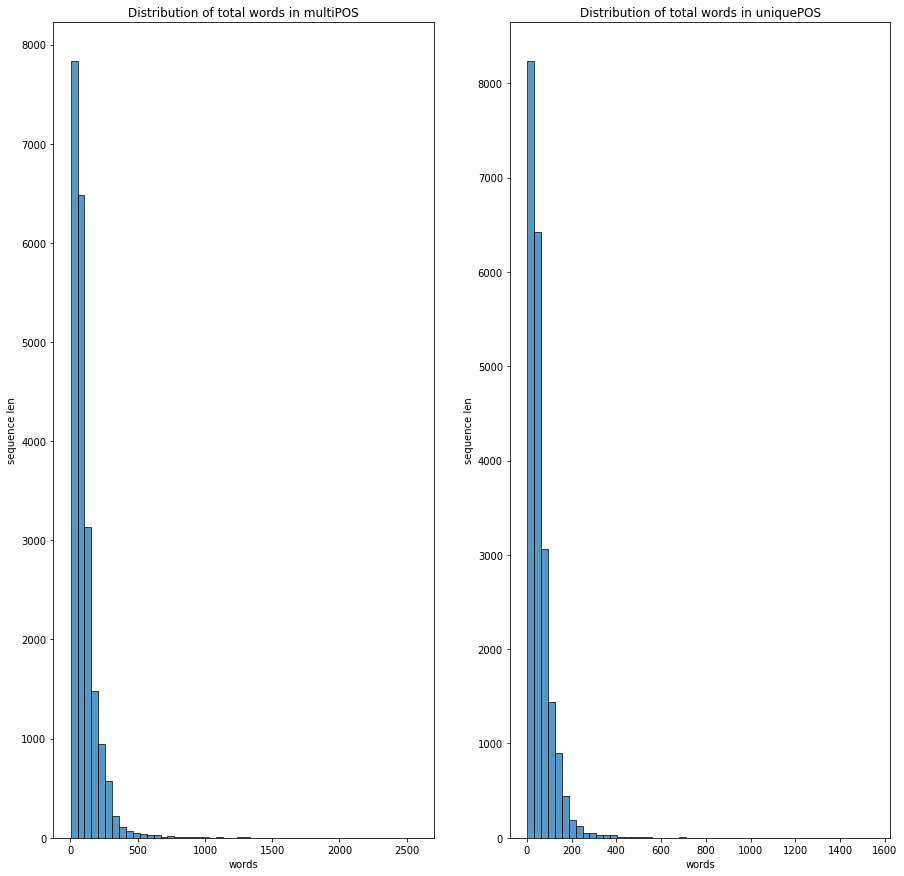

In [38]:
# Show character len of 2 columns
fig, axes = plt.subplots(1,2, squeeze=False, figsize=(15,15))
sns.histplot(data=len_multiPOS, ax=axes[0,0], bins=50)
sns.histplot(data=len_uniquePOS, ax=axes[0,1], bins=50)

axes[0, 0].set_title('Distribution of total words in multiPOS')
axes[0, 1].set_title('Distribution of total words in uniquePOS')

for ax in axes.flat:
    ax.set(xlabel='words', ylabel='sequence len')

plt.show()

> _The number of words used to complain the most is within 1-200 words_

#### Find the top 40 words by frequency among all the articles after processing the text.

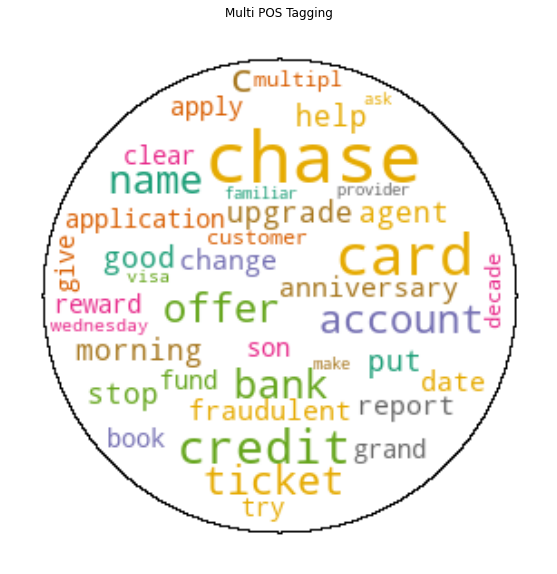

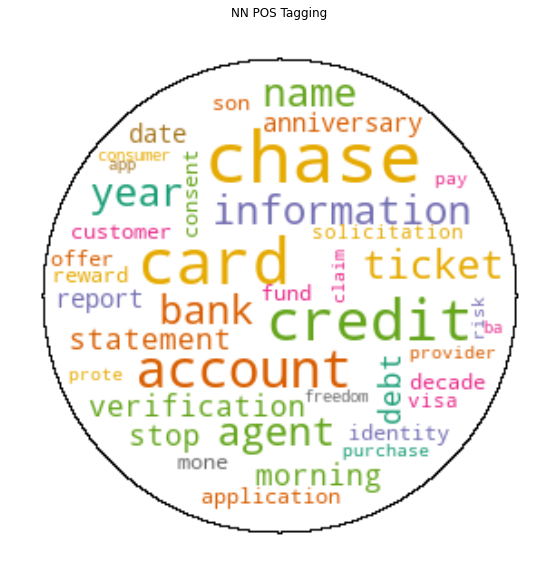

In [39]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

word_cloud_mulPOS = WordCloud(background_color='white',
                       stopwords=stopwords_en,
                       mask=mask,
                       contour_width=0.1,
                       max_font_size=40,
                       max_words=40, 
                       random_state=42,
                       contour_color="black",
                       colormap="Dark2",
                      ).generate(str(df_coml['complaint_multiPOS_tagging']))

word_cloud_uniquePOS = WordCloud(background_color='white',
                       stopwords=stopwords_en,
                       mask=mask,
                       contour_width=0.1,
                       max_font_size=40,
                       max_words=40, 
                       random_state=42,
                       contour_color="black",
                       colormap="Dark2"
                      ).generate(str(df_coml['complaint_uniquePOS_tagging']))

plt.figure(figsize=(10,10))
plt.imshow(word_cloud_mulPOS, interpolation="bilinear")
plt.axis("off")
plt.title('Multi POS Tagging')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(word_cloud_uniquePOS, interpolation="bilinear")
plt.axis("off")
plt.title('NN POS Tagging')
plt.show()

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [40]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_coml). 
def get_n_gram(grams, df, typ):
    n_words = CountVectorizer(stop_words=stopwords_en, ngram_range=(grams, grams))
    grams = n_words.fit_transform(df[f'complaint_{typ}_tagging']).astype(np.uint8)
    values_count = grams.toarray().sum(axis=0)
    vocabulary = n_words.vocabulary_
    # create Pandas dataframe statistics sorted sequences belong to vocab
    dfGrams = pd.DataFrame([(i[0], values_count[id_]) for id_, i in enumerate(vocabulary.items())]).rename(columns = {0:f'ngrams_{typ}', 1:f'frequency_{typ}'}).sort_values(by=[f'frequency_{typ}'], ascending=False)
    print(f'Capacity of DataFrame {typ}: ', round(dfGrams.memory_usage(deep='True').sum()*(10**-6), 2), 'GB')
    dfGrams=dfGrams.reset_index(drop=True)
    return dfGrams[:30]

In [41]:
#Print the top 30 words in the unigram frequency
most_ngrams_uniquePOS = get_n_gram(1, df_coml, 'uniquePOS')
most_ngrams_mulPOS = get_n_gram(1, df_coml, 'multiPOS')
merge_df = pd.concat([most_ngrams_uniquePOS, most_ngrams_mulPOS], axis=1)
merge_df.head()

Capacity of DataFrame uniquePOS:  1.0 GB
Capacity of DataFrame multiPOS:  1.56 GB


,ngrams_uniquePOS,frequency_uniquePOS,ngrams_multiPOS,frequency_multiPOS
0,ref,65433,ethic,81136
1,peace,47448,leave,47895
2,footnote,33720,illegall,34175
3,prequalification,30442,risky,30629
4,thrift,21362,identitytheft,28421


In [42]:
def visualize_ngrams(df, select=None):
    if select is None:
        fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1)

        df[['ngrams_uniquePOS', 'frequency_uniquePOS']].plot(ax=axes[0], kind='bar', )
        df[['ngrams_multiPOS', 'frequency_multiPOS']].plot(ax=axes[1], kind='bar');

        axes[0].set_title('Distribution of total words in uniquePOS')
        axes[0].set_xticks(range(30), labels=merge_df['ngrams_uniquePOS'], rotation=60)

        axes[1].set_title('Distribution of total words in multiPOS')
        axes[1].set_xticks(range(30), labels=merge_df['ngrams_multiPOS'], rotation=60)

        for ax in axes.flat:
            ax.set(xlabel='Top most words', ylabel='Sequence')

        plt.show()
        # plt.show()
    else:
        plt.figure(figsize=(20,20))
        df[['ngrams_uniquePOS', 'frequency_uniquePOS']].plot(kind='bar',)

        plt.title('Distribution of total words in uniquePOS')
        plt.xticks(range(30), labels=merge_df['ngrams_uniquePOS'], rotation=60)
        plt.xlabel('Top most words')
        plt.ylabel('Sequence')
        plt.show()

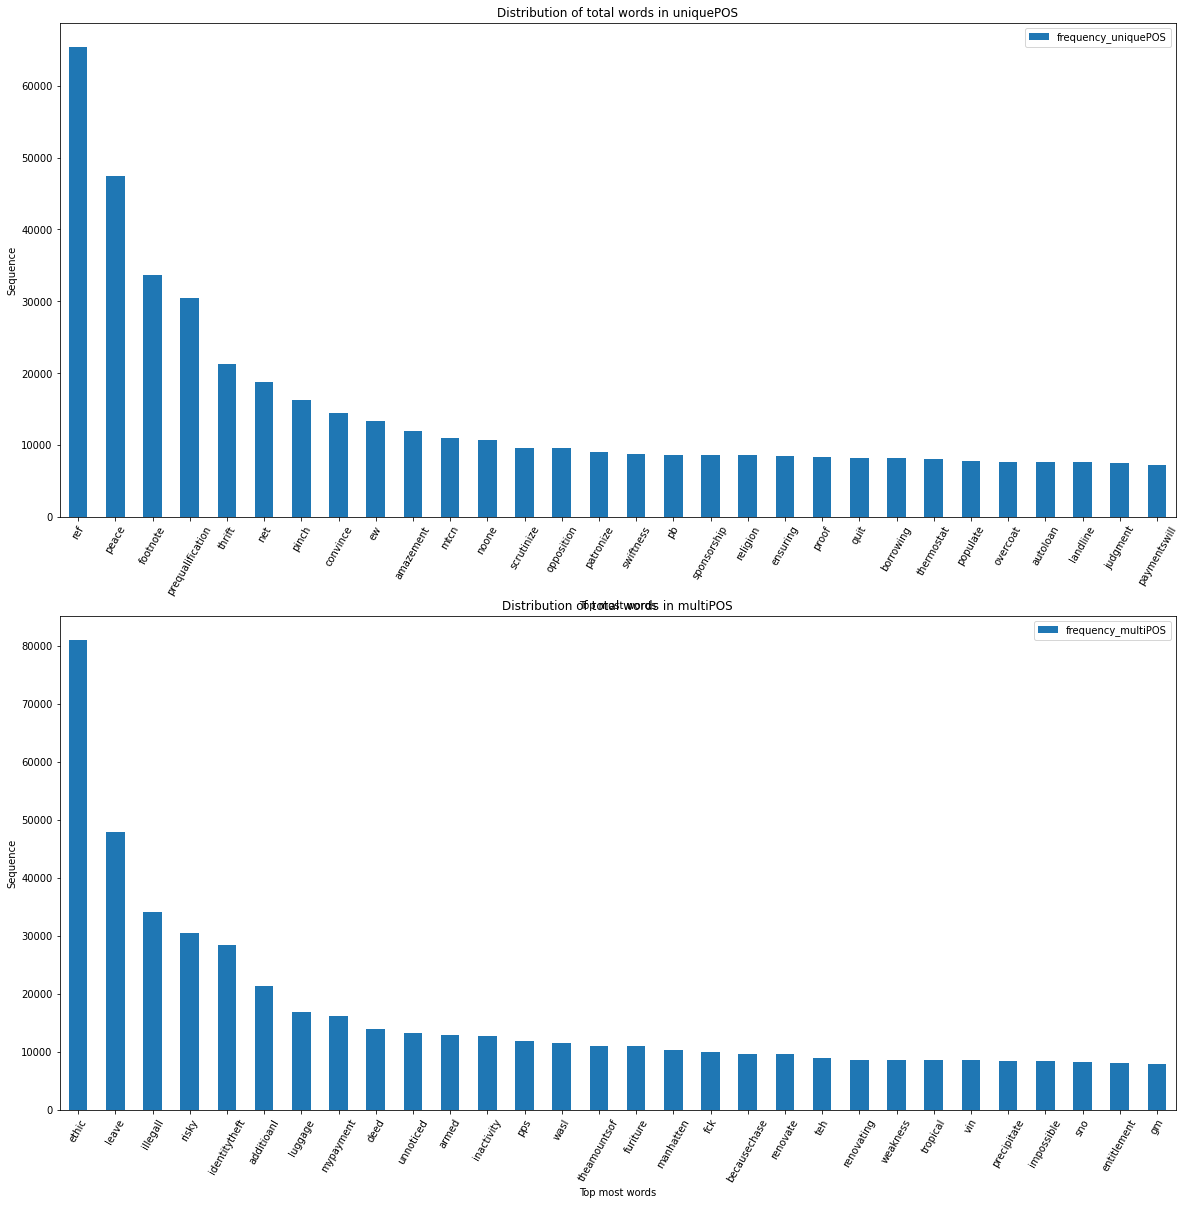

In [43]:
visualize_ngrams(merge_df)

In [44]:
#Print the top 30 words in the bigram frequency
most_ngrams_uniquePOS = get_n_gram(2, df_coml, 'uniquePOS')
most_ngrams_mulPOS = get_n_gram(2, df_coml, 'multiPOS')
merge_df = pd.concat([most_ngrams_uniquePOS, most_ngrams_mulPOS], axis=1)
merge_df.head()

Capacity of DataFrame uniquePOS:  25.79 GB
Capacity of DataFrame multiPOS:  46.21 GB


,ngrams_uniquePOS,frequency_uniquePOS,ngrams_multiPOS,frequency_multiPOS
0,law denial,12917,refinance condo,12973
1,foreclosure judiciary,4004,check posession,12887
2,video chase,3646,note third,4010
3,chase document,3575,reach credit,3272
4,complaint amount,3475,profitability assume,3270


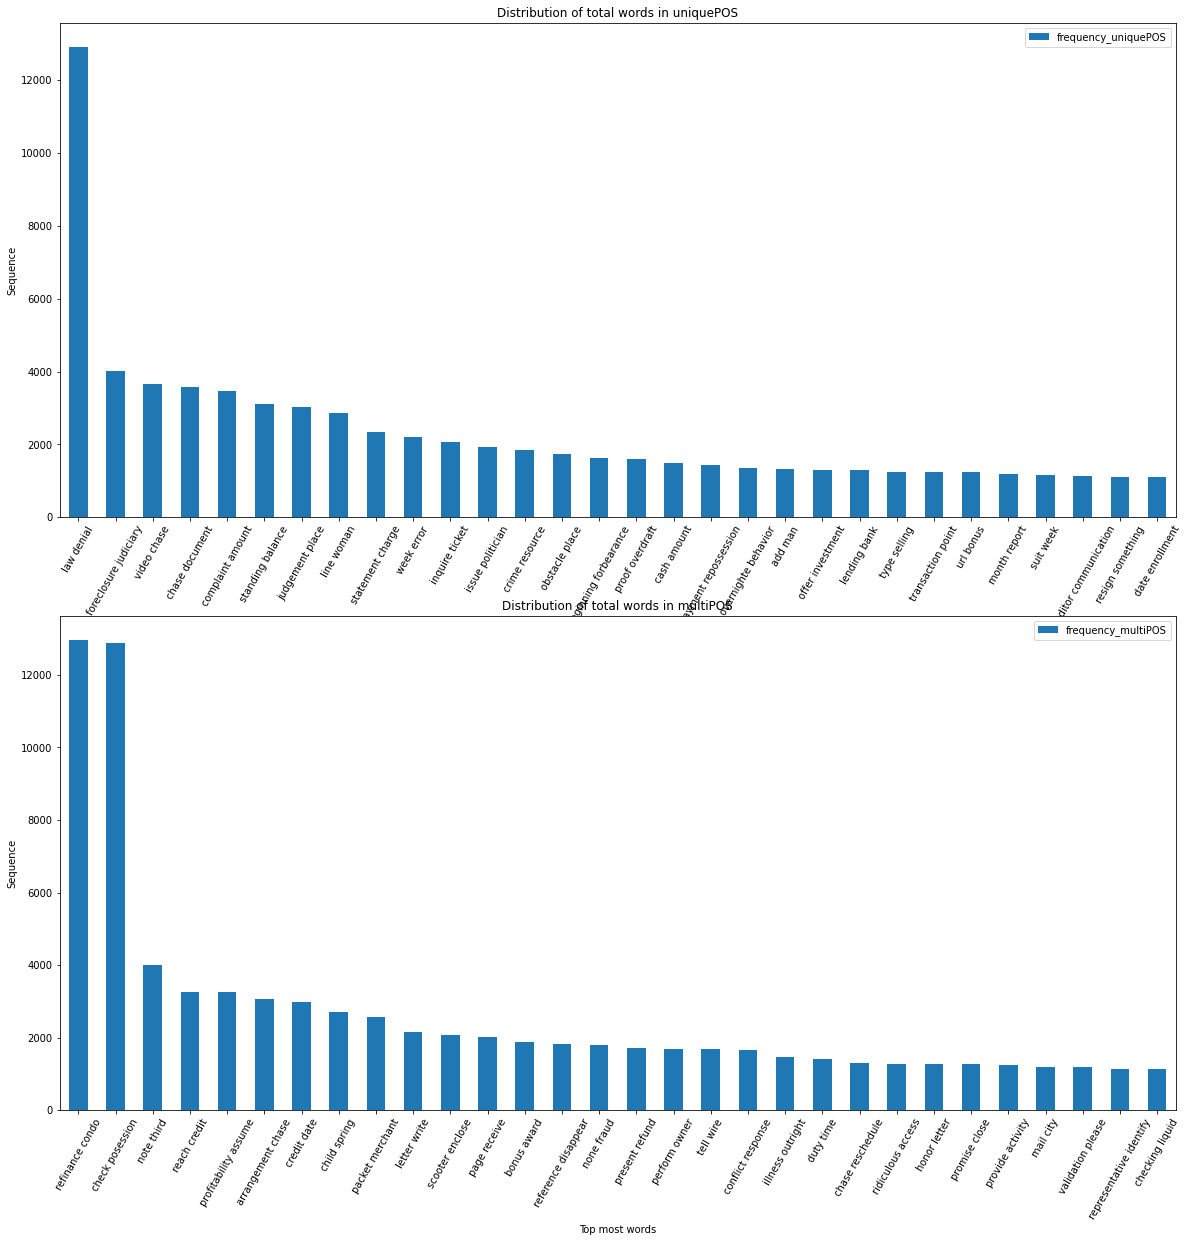

In [45]:
visualize_ngrams(merge_df)

In [46]:
# Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram. 
most_ngrams_uniquePOS = get_n_gram(3, df_coml, 'uniquePOS')
# most_ngrams_mulPOS = get_n_gram(3, df_mulPOS, '_mulPOS')    # out of memory to create data
# merge_df = pd.concat([most_ngrams_uniquePOS, most_ngrams_mulPOS], axis=1)
most_ngrams_uniquePOS.head()

Capacity of DataFrame uniquePOS:  77.37 GB


,ngrams_uniquePOS,frequency_uniquePOS
0,service state credit,2547
1,complain female call,1048
2,search scammer item,995
3,ch coffee mug,857
4,balanace chase opening,610


<Figure size 1440x1440 with 0 Axes>

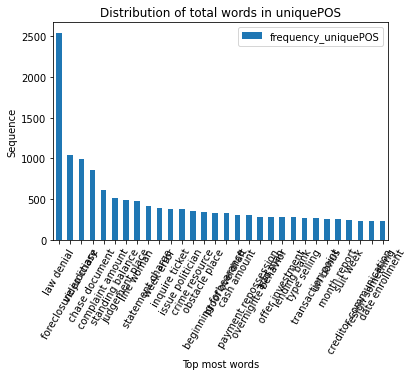

In [47]:
visualize_ngrams(most_ngrams_uniquePOS, select=1)

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [48]:
#We code to initialise the TfidfVectorizer 
def generate_tfidf(df, typ):
    tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_mat = tfidf.fit_transform(df[f'complaint_{typ}_tagging'])
    return tfidf, tfidf_mat

In [49]:
# Apply with 2 cols
tfidf_mulPOS, tfidf_mat_mulPOS = generate_tfidf(df_coml, 'uniquePOS')
tfidf_uniquePOS, tfidf_mat_uniquePOS = generate_tfidf(df_coml, 'multiPOS')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [50]:
# Set nmf_model with the n_components i.e 5
num_topics = 5

# Keep the random_state =40
nmf_model_mulPOS = NMF(random_state=40, n_components=num_topics)
nmf_model_uniquePOS = NMF(random_state=40, n_components=num_topics)

In [51]:
nmf_model_mulPOS.fit(tfidf_mat_mulPOS)
nmf_model_uniquePOS.fit(tfidf_mat_uniquePOS)

len(tfidf_mulPOS.get_feature_names()), len(tfidf_uniquePOS.get_feature_names())

(6427, 9993)

In [52]:
# Print the Top15 words for each of the topics
# Define function to show 15 words of top for each of the topics

def get_15top(tfidf, nmf_model):
    list_of_words = np.array(tfidf.get_feature_names())
    topic_words_df = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'topics {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

    for i in range(num_topics):
        ix = nmf_model.components_[i].argsort()[::-1][:15]
        topic_words_df.iloc[i] = list_of_words[ix]

    return topic_words_df

In [53]:
top15 = get_15top(tfidf_mulPOS, nmf_model_mulPOS)
top15

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
topics 1,account,check,bank,money,chase,fund,deposit,checking,branch,day,transaction,number,business,claim,transfer
topics 2,card,charge,chase,credit,dispute,fee,purchase,transaction,fraud,service,merchant,time,balance,company,customer
topics 3,loan,mortgage,chase,home,modification,property,year,letter,document,time,rate,foreclosure,sale,house,request
topics 4,credit,report,inquiry,card,account,score,debt,company,information,reporting,identity,chase,bureaus,application,limit
topics 5,payment,balance,month,fee,statement,day,auto,time,chase,date,credit,pay,account,year,car


In [54]:
top15 = get_15top(tfidf_uniquePOS, nmf_model_uniquePOS)
top15

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
topics 1,account,bank,check,chase,money,deposit,fund,close,checking,branch,day,open,transfer,tell,business
topics 2,credit,report,card,inquiry,chase,hard,account,remove,score,company,debt,open,information,limit,application
topics 3,loan,mortgage,chase,home,modification,property,year,letter,document,foreclosure,time,rate,bank,house,sale
topics 4,charge,card,chase,dispute,transaction,fee,purchase,merchant,refund,fraud,claim,service,fraudulent,credit,use
topics 5,payment,late,pay,balance,fee,make,month,statement,monthly,auto,day,time,chase,credit,account


In [55]:
topic_mulPOS_results = nmf_model_mulPOS.transform(tfidf_mat_mulPOS)
topic_mulPOS_results.argmax(axis=1)

array([2, 1, 3, ..., 1, 4, 4])

In [56]:
topic_uniquePOS_results = nmf_model_uniquePOS.transform(tfidf_mat_uniquePOS)
topic_uniquePOS_results.argmax(axis=1)

array([2, 3, 1, ..., 3, 4, 4])

> * It can be seen that the choice of pos Tag affects the grouping of classes. However, we still keep the same value for each columns

In [57]:
#Assign the best topic to each of the cmplaints in Topic Column

df_coml['topics_multiPOS'] = topic_mulPOS_results.argmax(axis=1)
df_coml.head()

,complaints,col_lemmat,complaint_multiPOS_tagging,complaint_uniquePOS_tagging,topics_multiPOS
0,good morning my name is and i appreciate it if...,good morning my name be and I appreciate it if...,good morning name be help put stop chase bank ...,morning name stop debt verification statement ...,2
1,i upgraded my card in and was told by the agen...,I upgrade my card in and be tell by the agent ...,card be agent upgrade anniversary date change ...,card agent anniversary date agent information ...,1
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card report application identity consent...,3
3,on while trying to book a ticket i came across...,on while try to book a ticket I come across an...,try book ticket offer be apply ticket reward c...,ticket offer ticket reward card information of...,3
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son give chase account fund clear chase ...,son chase account fund chase bank account mone...,0


In [58]:
df_coml['topics_uniquePOS'] = topic_uniquePOS_results.argmax(axis=1)
df_coml.head()

,complaints,col_lemmat,complaint_multiPOS_tagging,complaint_uniquePOS_tagging,topics_multiPOS,topics_uniquePOS
0,good morning my name is and i appreciate it if...,good morning my name be and I appreciate it if...,good morning name be help put stop chase bank ...,morning name stop debt verification statement ...,2,2
1,i upgraded my card in and was told by the agen...,I upgrade my card in and be tell by the agent ...,card be agent upgrade anniversary date change ...,card agent anniversary date agent information ...,1,3
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card report application identity consent...,3,1
3,on while trying to book a ticket i came across...,on while try to book a ticket I come across an...,try book ticket offer be apply ticket reward c...,ticket offer ticket reward card information of...,3,1
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son give chase account fund clear chase ...,son chase account fund chase bank account mone...,0,0


In [59]:
#Print the first 5 Complaint for each of the Topics
print(df_coml.groupby('topics_multiPOS')[['complaint_multiPOS_tagging','topics_multiPOS']].head(5))

                           complaint_multiPOS_tagging  topics_multiPOS
0   good morning name be help put stop chase bank ...                2
1   card be agent upgrade anniversary date change ...                1
2   chase card be report fraudulent application be...                3
3   try book ticket offer be apply ticket reward c...                3
4   grand son give chase account fund clear chase ...                0
5                               please remove inquiry                3
6   notice j p morgan chase account debit card tue...                0
7   summer month decline income employment month p...                4
8   payment online retailer use chase quick pay ch...                1
9   chase credit card which report datum credit re...                3
10                       mishandle account chase auto                0
11  several time attempt have fraudulent inquiry r...                3
12  account chase bank use code bonus follow term ...                0
13  co

1    6261
0    5629
2    3853
3    2934
4    2394
Name: topics_multiPOS, dtype: int64


<AxesSubplot:>

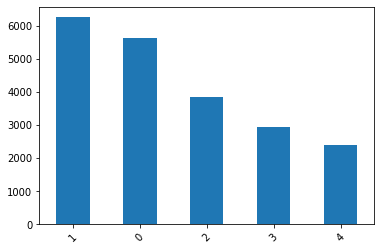

In [60]:
print(df_coml['topics_multiPOS'].value_counts())
df_coml['topics_multiPOS'].value_counts().plot.bar(x='topics_multiPOS', y='No.Topics of MultiPOS', rot=45)

In [61]:
#Print the first 5 Complaint for each of the Topics
print(df_coml.groupby('topics_uniquePOS')['complaint_uniquePOS_tagging', 'topics_uniquePOS'].head(5))

                          complaint_uniquePOS_tagging  topics_uniquePOS
0   morning name stop debt verification statement ...                 2
1   card agent anniversary date agent information ...                 3
2   chase card report application identity consent...                 1
3   ticket offer ticket reward card information of...                 1
4   son chase account fund chase bank account mone...                 0
5                                             inquiry                 1
6   notice chase account debit card branch custome...                 0
7   summer month decline income employment month p...                 2
8   payment retailer chase pay chase website scam ...                 3
9       chase credit card credit report company issue                 1
10                       mishandle account chase auto                 0
11  time attempt inquiry remove creditor inquiry r...                 1
12  account code bonus term everything account dep...           

3    5715
0    5133
1    3999
2    3945
4    2279
Name: topics_uniquePOS, dtype: int64


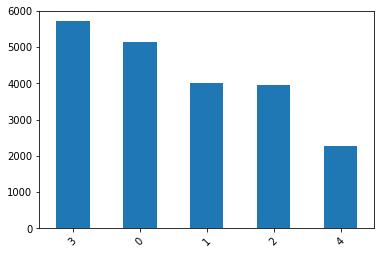

In [62]:
print(df_coml['topics_uniquePOS'].value_counts())
plot_df = df_coml['topics_uniquePOS'].value_counts().plot.bar(x='topics_uniquePOS', y='No.Topics of NN POS', rot=45)

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [63]:
#Create the dictionary of Topic names and Topics

Topic_names = {0:'Bank Acc Services', 1:'Theft/Dispute Reporting', 2:'Mortgage/Loan', 3:'Others', 4:'Credit/Prepaid card'}
df_coml['topics_multiPOS'] = df_coml['topics_multiPOS'].replace(Topic_names)
df_coml['topics_uniquePOS'] = df_coml['topics_uniquePOS'].replace(Topic_names)

In [64]:
df_coml.head()

,complaints,col_lemmat,complaint_multiPOS_tagging,complaint_uniquePOS_tagging,topics_multiPOS,topics_uniquePOS
0,good morning my name is and i appreciate it if...,good morning my name be and I appreciate it if...,good morning name be help put stop chase bank ...,morning name stop debt verification statement ...,Mortgage/Loan,Mortgage/Loan
1,i upgraded my card in and was told by the agen...,I upgrade my card in and be tell by the agent ...,card be agent upgrade anniversary date change ...,card agent anniversary date agent information ...,Theft/Dispute Reporting,Others
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card report application identity consent...,Others,Theft/Dispute Reporting
3,on while trying to book a ticket i came across...,on while try to book a ticket I come across an...,try book ticket offer be apply ticket reward c...,ticket offer ticket reward card information of...,Others,Theft/Dispute Reporting
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son give chase account fund clear chase ...,son chase account fund chase bank account mone...,Bank Acc Services,Bank Acc Services


In [65]:
df_coml.shape

(21071, 6)

## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [66]:
#Create the dictionary again of Topic names and Topics
topic_names = {'Bank Acc Services':0, 
               'Theft/Dispute Reporting':1, 
               'Mortgage/Loan':2,
               'Others':3,
               'Credit/Prepaid card':4}
df_coml['topics_multiPOS'] = df_coml['topics_multiPOS'].replace(topic_names)
df_coml['topics_uniquePOS'] = df_coml['topics_uniquePOS'].replace(topic_names)

In [67]:
df_coml.head()

,complaints,col_lemmat,complaint_multiPOS_tagging,complaint_uniquePOS_tagging,topics_multiPOS,topics_uniquePOS
0,good morning my name is and i appreciate it if...,good morning my name be and I appreciate it if...,good morning name be help put stop chase bank ...,morning name stop debt verification statement ...,2,2
1,i upgraded my card in and was told by the agen...,I upgrade my card in and be tell by the agent ...,card be agent upgrade anniversary date change ...,card agent anniversary date agent information ...,1,3
2,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report fraudulent application be...,chase card report application identity consent...,3,1
3,on while trying to book a ticket i came across...,on while try to book a ticket I come across an...,try book ticket offer be apply ticket reward c...,ticket offer ticket reward card information of...,3,1
4,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,grand son give chase account fund clear chase ...,son chase account fund chase bank account mone...,0,0


In [68]:
# Shrink data
df_coml = df_coml[['complaints', 'topics_multiPOS', 'topics_uniquePOS']]

In [69]:
df_coml.head()

,complaints,topics_multiPOS,topics_uniquePOS
0,good morning my name is and i appreciate it if...,2,2
1,i upgraded my card in and was told by the agen...,1,3
2,chase card was reported on however fraudulent ...,3,1
3,on while trying to book a ticket i came across...,3,1
4,my grand son give me check for i deposit it in...,0,0


In [70]:
df_coml.shape

(21071, 3)

#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [71]:
#rite code to get the Vector count
count_vector = CountVectorizer(analyzer='word', stop_words='english')
x_train = count_vector.fit_transform(df_coml['complaints'])

# pickle.dump(count_vector.vocabulary_, open("count_vector_save.pkl","wb"))
#Write to transform the word vector to tf-idf
count_vector.get_feature_names_out()

array(['aa', 'aaa', 'aaccounts', ..., 'zoo', 'zoom', 'zoomed'],
      dtype=object)

In [72]:
tfidf_transform = TfidfTransformer()
x_train_tfidf = tfidf_transform.fit_transform(x_train)

In [73]:
# pickle.dump(tfidf_transform, open("tfidf_save.pkl","wb"))

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Naive Bayes
* Types of Support vector machine
**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [74]:
# Write code to build any 3 models and evaluate them using the required metrics
X_train_multiPOS, X_test_multiPOS, y_train_multiPOS, y_test_multiPOS = train_test_split(x_train_tfidf, df_coml['topics_multiPOS'], random_state=42, test_size=0.25)

X_train_uniquePOS, X_test_uniquePOS, y_train_uniquePOS, y_test_uniquePOS = train_test_split(x_train_tfidf, df_coml['topics_uniquePOS'], random_state=42, test_size=0.25)


print('Shape of x train data multi_POS: \t', X_train_multiPOS.shape)
print('Shape of x test data multi_POS: \t', X_test_multiPOS.shape)
print('Shape of y train data multi_POS: \t', y_train_multiPOS.shape)
print('Shape of y test data multi_POS: \t', y_test_multiPOS.shape)
print('=*'*30)
print('Shape of x train data nn_POS: \t\t', X_train_uniquePOS.shape)
print('Shape of x test data nn_POS: \t\t', X_test_uniquePOS.shape)
print('Shape of y train data nn_POS: \t\t', y_train_uniquePOS.shape)
print('Shape of y test data nn_POS: \t\t', y_test_uniquePOS.shape)

Shape of x train data multi_POS: 	 (15803, 27207)
Shape of x test data multi_POS: 	 (5268, 27207)
Shape of y train data multi_POS: 	 (15803,)
Shape of y test data multi_POS: 	 (5268,)
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Shape of x train data nn_POS: 		 (15803, 27207)
Shape of x test data nn_POS: 		 (5268, 27207)
Shape of y train data nn_POS: 		 (15803,)
Shape of y test data nn_POS: 		 (5268,)


# Model: Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

typ1=[X_train_multiPOS, X_test_multiPOS, y_train_multiPOS, y_test_multiPOS]
typ2=[X_train_uniquePOS, X_test_uniquePOS, y_train_uniquePOS, y_test_uniquePOS]

In [76]:
report_dic = {} # Create a dict to contain accuracy of each models

def logistic_train(data, lblname, opt=None):
    global report_dic
    get_model = []
    for typ in range(len(data)):
        if opt is None:
            lgr_train = LogisticRegression(max_iter=150)
        else:
            lgr_train = LogisticRegression(max_iter=150,
                                           C=opt['C'],
                                           solver= opt['solver'])
            
        lgr_train.fit(data[typ][0], data[typ][2])    
        acc_train = lgr_train.score(data[typ][1], data[typ][3])
        get_model.append(lgr_train)
        report_dic[lblname[typ]]=round(acc_train,3)
    
    return get_model

In [77]:
## Apply train model
labels = ['LRegression multiPOS', 'LRegression uniquePOS']
model_lr_standard = logistic_train([typ1, typ2], labels)

In [78]:
# Logistic regression with GripsearchCV

def logistic_train_opt(typ1, typ2):    
    parameters = {'C': [0.01, 0.05, 0.1, 1, 10, 50, 100],
                  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

    for itr in range(2):
        grid_lr_opt = GridSearchCV(estimator=LogisticRegression(max_iter=500), 
                               param_grid=parameters,
                               verbose=1,
                               scoring='f1_weighted',
                               n_jobs=-1,
                               cv=5)
        if itr==0:
            label = ['LRegression multiPOS Optimz']
            grid_lr_opt.fit(typ1[0], typ1[2])
            bestpr = grid_lr_opt.best_params_
            print('===', label[0], '\t', bestpr)
            model1 = logistic_train([typ1], label, bestpr)
        else:
            label = ['LRegression uniquePOS Optimz']
            grid_lr_opt.fit(typ2[0], typ2[2])
            bestpr = grid_lr_opt.best_params_
            print('===', label[0], '\t', bestpr)
            model2 = logistic_train([typ2], label, bestpr)
            
    return [model1, model2]

In [79]:
model_lr_opt = logistic_train_opt(typ1, typ2)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
=== LRegression multiPOS Optimz 	 {'C': 10, 'solver': 'newton-cg'}
Fitting 5 folds for each of 35 candidates, totalling 175 fits
=== LRegression uniquePOS Optimz 	 {'C': 1, 'solver': 'newton-cg'}


# Model: Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
def decisionTree_train(data, lblname, opt=None):
    global report_dic
    get_model = []
    for typ in range(len(data)):
        if opt is None:
            dtc_train = DecisionTreeClassifier()
        else:
            dtc_train = DecisionTreeClassifier(criterion=opt['criterion'],
                                               max_depth= opt['max_depth'],
                                               min_samples_leaf=opt['min_samples_leaf'])
            
        dtc_train.fit(data[typ][0], data[typ][2])    
        acc_train = dtc_train.score(data[typ][1], data[typ][3])
        report_dic[lblname[typ]]=round(acc_train, 3)
        get_model.append(dtc_train)
    
    return get_model

In [82]:
labels = ['DecisionTree multiPOS', 'DecisionTree uniquePOS']
model_dct_standard = decisionTree_train([typ1, typ2], labels)

In [83]:
def decisionTree_train_opt(typ1, typ2):    
    parameters = {'criterion': ['gini', 'entropy'],
                  'max_depth' : [5, 10, 15, 20, 25, 30],
                  'min_samples_leaf':[1,5,10,15, 20, 25],}

    for itr in range(2):
        grid_dct_opt = GridSearchCV(estimator=DecisionTreeClassifier(), 
                               param_grid=parameters,
                               verbose=1,
                               scoring='f1_weighted',
                               n_jobs=-1,
                               cv=5)
        if itr==0:
            label = ['DecisionTree multiPOS Optimz']
            grid_dct_opt.fit(typ1[0], typ1[2])
            bestpr = grid_dct_opt.best_params_
            print('===', label[0], '\t', bestpr)
            model1 = decisionTree_train([typ1], label, bestpr)
        else:
            label = ['DecisionTree uniquePOS Optimz']
            grid_dct_opt.fit(typ2[0], typ2[2])
            bestpr = grid_dct_opt.best_params_
            print('===', label[0], '\t', bestpr)
            model2 = decisionTree_train([typ2], label, bestpr)
            
    return [model1, model2]


In [84]:
model_dct_opt = decisionTree_train_opt(typ1, typ2)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
=== DecisionTree multiPOS Optimz 	 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 15}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
=== DecisionTree uniquePOS Optimz 	 {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 15}


# NAIVE BAYES MODEL

In [85]:
from sklearn.naive_bayes import MultinomialNB

In [86]:
def naivebayes_train(data, lblname, opt=None):
    global report_dic
    get_model = []
    for typ in range(len(data)):
        if opt is None:
            naive_train = MultinomialNB()
        else:
            naive_train = MultinomialNB(alpha=opt['alpha'],
                                      fit_prior= opt['fit_prior'])
            
        naive_train.fit(data[typ][0], data[typ][2])    
        acc_train = naive_train.score(data[typ][1], data[typ][3])
        report_dic[lblname[typ]]=round(acc_train,3)
        get_model.append(naive_train)
    
    return get_model

In [87]:
labels = ['NaiveBayes multiPOS', 'NaiveBayes uniquePOS']
model_naivebayes_standard = naivebayes_train([typ1, typ2], labels)

In [88]:
def naivebayes_train_opt(typ1, typ2):    
    parameters = {'alpha': (10, 5, 1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001),
                  'fit_prior':[True, False]}

    for itr in range(2):
        grid_naive_opt = GridSearchCV(estimator=MultinomialNB(), 
                               param_grid=parameters,
                               verbose=1,
                               scoring='f1_weighted',
                               n_jobs=-1,
                               cv=5)
        if itr==0:
            label = ['NaiveBayes multiPOS Optimz']
            grid_naive_opt.fit(typ1[0], typ1[2])
            bestpr = grid_naive_opt.best_params_
            print('===', label[0], '\t', bestpr)
            model1 = naivebayes_train([typ1], label, bestpr)
        else:
            label = ['NaiveBayes uniquePOS Optimz']
            grid_naive_opt.fit(typ2[0], typ2[2])
            bestpr = grid_naive_opt.best_params_
            print('===', label[0], '\t', bestpr)
            model2 = naivebayes_train([typ2], label, bestpr)
            
    return [model1, model2]


In [89]:
model_naivebayes_opt = naivebayes_train_opt(typ1, typ2)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
=== NaiveBayes multiPOS Optimz 	 {'alpha': 0.1, 'fit_prior': False}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
=== NaiveBayes uniquePOS Optimz 	 {'alpha': 0.1, 'fit_prior': False}


# Train with Support Vector Machine

In [90]:
from sklearn.svm import SVC

In [91]:
## Use SVM with kernel types = [linear, poly and rbf]

In [92]:
def svm_svc_train(data, lblname, kernel='linear'):
    global report_dic
    get_model = []
    for i in range(2):
        svm_train = SVC(kernel=kernel)
        if i == 0:
            svm_train.fit(data[0][0], data[0][2])    
            acc_train = svm_train.score(data[0][1], data[0][3])
            report_dic[lblname[0]]=round(acc_train,3)
            get_model.append(svm_train)
        else:
            svm_train.fit(data[1][0], data[1][2])    
            acc_train = svm_train.score(data[1][1], data[1][3])
            report_dic[lblname[1]]=round(acc_train,3)
            get_model.append(svm_train)
    return get_model

In [93]:
labels = ['SVM_linear multiPOS', 'SVM_linear uniquePOS']
model_svm_linear = svm_svc_train([typ1, typ2], lblname=labels)

In [94]:
labels = ['SVM_poly multiPOS', 'SVM_poly uniquePOS']
kernel = 'poly'
model_svm_poly = svm_svc_train([typ1, typ2], lblname=labels, kernel=kernel)

In [95]:
labels = ['SVM_rbf multiPOS', 'SVM_rbf uniquePOS']
kernel='rbf'
model_svm_rbf = svm_svc_train([typ1, typ2], lblname=labels, kernel=kernel)

In [96]:
report_dic

{'LRegression multiPOS': 0.935,
 'LRegression uniquePOS': 0.942,
 'LRegression multiPOS Optimz': 0.936,
 'LRegression uniquePOS Optimz': 0.942,
 'DecisionTree multiPOS': 0.799,
 'DecisionTree uniquePOS': 0.78,
 'DecisionTree multiPOS Optimz': 0.811,
 'DecisionTree uniquePOS Optimz': 0.798,
 'NaiveBayes multiPOS': 0.729,
 'NaiveBayes uniquePOS': 0.763,
 'NaiveBayes multiPOS Optimz': 0.798,
 'NaiveBayes uniquePOS Optimz': 0.818,
 'SVM_linear multiPOS': 0.928,
 'SVM_linear uniquePOS': 0.935,
 'SVM_poly multiPOS': 0.819,
 'SVM_poly uniquePOS': 0.827,
 'SVM_rbf multiPOS': 0.928,
 'SVM_rbf uniquePOS': 0.935}

In [97]:
# Create data report accuracy of each models
df_report = pd.DataFrame.from_dict(report_dic, orient='index', columns=['Accuracy'])

In [98]:
df_report = df_report.rename(columns = {'index':'Models'})

In [99]:
df_report=df_report.sort_values(by = 'Accuracy', ascending=False)
df_report.reset_index(inplace=True)
df_report

,index,Accuracy
0,LRegression uniquePOS,0.942
1,LRegression uniquePOS Optimz,0.942
2,LRegression multiPOS Optimz,0.936
3,LRegression multiPOS,0.935
4,SVM_linear uniquePOS,0.935
5,SVM_rbf uniquePOS,0.935
6,SVM_linear multiPOS,0.928
7,SVM_rbf multiPOS,0.928
8,SVM_poly uniquePOS,0.827
9,SVM_poly multiPOS,0.819


> * We can see the best model are : LRegression uniquePOS and LRegression uniquePOS Optimz with the same Accuracy
> * We only get LRegression uniquePOS to be the best model and inference it

In [100]:
# Get 'LRegression uniquePOS' model
best_model_lr_standard_nnPOS = model_lr_standard[1]

In [101]:
# Get classification matric and report based on y_test
y_pred = best_model_lr_standard_nnPOS.predict(X_test_uniquePOS)
report = classification_report(y_test_uniquePOS, y_pred)

In [102]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1268
           1       0.95      0.93      0.94      1000
           2       0.95      0.94      0.95       981
           3       0.93      0.95      0.94      1462
           4       0.96      0.88      0.92       557

    accuracy                           0.94      5268
   macro avg       0.95      0.93      0.94      5268
weighted avg       0.94      0.94      0.94      5268



[]

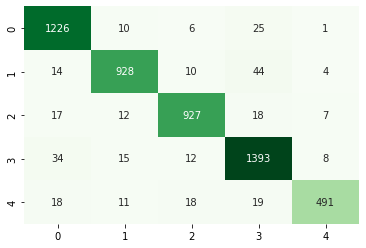

In [103]:
confusion = confusion_matrix(y_test_uniquePOS, y_pred)
sns.heatmap(confusion, annot=True, cbar=None, cmap="Greens", fmt='d')
plt.plot()

# Inference with custom text

In [104]:
text_custom = ["This product is not good, has many defects and scratches on the case, looks old and low quality. I don't like it even though this is the 4th time I bought it",
                "Your bank branch did not resolve my query regarding my card blocking. I have been waiting a long time for a response but still no satisfactory answer. I want to know what is wrong with my account and why?",
                "Next time I pay the debt, the amount I have to pay is 19 million, I will pay it in one more period and the debt will be cleared.",
                "Thank you for using our express payment service. In the process of product development we are pleased to earn your trust. !",
                "I want to report ABCDE store for cheating while paying me change. I had to pay the bill 3 times higher than it actually was.",
                ]

In [105]:
topics_result = []
for i in text_custom:
    X_new_count = count_vector.transform([text_process(i)])
    X_new_tfidf = tfidf_transform.transform(X_new_count)
    prediction = best_model_lr_standard_nnPOS.predict(X_new_tfidf)
    topics_result.append(Topic_names[prediction[0]])

In [107]:
df_predict = pd.DataFrame(list(zip(text_custom, topics_result)), columns=['Text', 'Topics predict'])

In [108]:
df_predict.head()

,Text,Topics predict
0,"This product is not good, has many defects and...",Others
1,Your bank branch did not resolve my query rega...,Bank Acc Services
2,"Next time I pay the debt, the amount I have to...",Mortgage/Loan
3,Thank you for using our express payment servic...,Credit/Prepaid card
4,I want to report ABCDE store for cheating whil...,Theft/Dispute Reporting


## <center>--END--</center>